In [43]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [44]:
df = pd.read_csv('diabetes[1].csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for col in zero_not_accepted:
    df[col] = df[col].replace(0, np.NaN)
    mean = int(df[col].mean(skipna = True))
    df[col] = df[col].replace(np.NaN, mean)

In [46]:
x = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [47]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [48]:
import math
math.sqrt(len(y_test))

12.409673645990857

In [49]:
knn = KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')

In [50]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [15, 32]], dtype=int64)

In [52]:
f1_score(y_test, y_pred)

0.6956521739130436

In [53]:
accuracy_score(y_test, y_pred)

0.8181818181818182

# Classification of 3 classes

math =  5.477225575051661

y_pred =  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]

confusion matrix :
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

f1 score = 1.0

accuracy score =  1.0

precisio score =  1.0

recall score =  1.0

classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



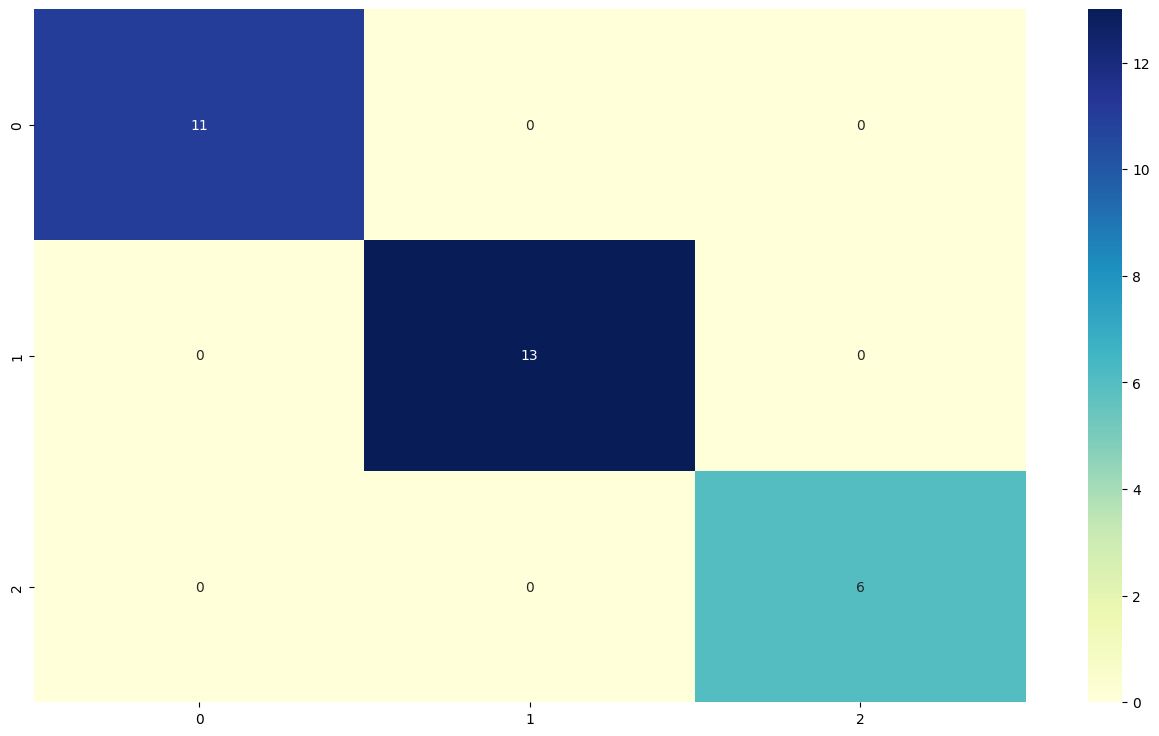

In [59]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

le = LabelEncoder()
ss = StandardScaler()
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'euclidean')

df = pd.read_csv('Iris.csv')

df['Species'] = le.fit_transform(df['Species'])
x = df.iloc[:, 0:5]
y = df.iloc[:, 5]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('math = ',math.sqrt(len(y_test)))
print('\ny_pred = ',y_pred)
print('\nconfusion matrix :\n', confusion_matrix(y_test, y_pred))
print('\nf1 score =',f1_score(y_test, y_pred, average = 'micro'))
print('\naccuracy score = ', accuracy_score(y_test, y_pred))
print('\nprecisio score = ', precision_score(y_test, y_pred, average = 'micro'))
print('\nrecall score = ', recall_score(y_test, y_pred, average = 'micro'))
print('\nclassification report :\n', classification_report(y_test, y_pred))
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'YlGnBu')
plt.show()

In [24]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [25]:
x = df.iloc[:, 0:5]
y = df.iloc[:, 5]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

math.sqrt(len(y_test))

5.477225575051661

In [27]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [28]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [30]:
f1_score(y_test, y_pred, average = 'micro')

1.0

In [31]:
accuracy_score(y_test, y_pred)

1.0